# **Project: DetectaDiabetes: Exploración predictiva de la diabetes, un análisis basado en el BRFSS 2015**
- **Source**: UC Irvine Machine Learning Repository. (19 de Marzo del 2025). CDC Diabetes Health Indicators, enlace https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
- **Date**: 25/09/23
- **Goal**: Create a basic prediction model and a feature explainer

- 1. Introduccion
- 2. Conceptos
- 3. Hipotesis
- 4. Preprocesamiento
- 5. EDA
- 6. Desarrollo de modelos de machine learning
- 7. Comparacion de modelos
- 8. Visualizacion del modelo
- 9. Conclusiones y recomendaciones
- 10. Referencias (apa)

## **1. Introducción**

Este proyecto aborda el tema de la diabetes, una enfermedad crónica que afecta a millones de personas en todo el mundo y tiene un impacto significativo en la calidad de vida y en los sistemas de salud. La detección temprana y el análisis de factores de riesgo son esenciales para desarrollar medidas preventivas eficaces. En este contexto, el presente proyecto se centra en el uso de técnicas de *machine learning* para analizar datos del conjunto **BRFSS** (Behavioral Risk Factor Surveillance System). Su objetivo principal es identificar patrones y construir modelos predictivos que permitan estimar el riesgo de diabetes considerando variables como factores demográficos, conductuales y de salud. 

## **2. Conceptos**

### **2.1 Diabetes**
Enfermedad crónica que afecta la forma en que el cuerpo utiliza la glucosa.
Puede causar daño a órganos y sistemas si no se controla adecuadamente.

### **2.2 Tipos de diabetes**

- Tipo 1: El cuerpo no produce insulina (autoinmune).
- Tipo 2: El cuerpo no usa correctamente la insulina (más común).
- Gestacional: Ocurre durante el embarazo.
- Prediabetes: Glucosa elevada, pero no suficiente para diagnóstico.
- Otros tipos: Monogénica o inducida por daño al páncreas.

### **2.3 Hiperglucemia**
Elevación de los niveles de glucosa en sangre, consecuencia común de la diabetes no controlada.

### **2.4 BRFSS (Behavioral Risk Factor Surveillance System)**
Sistema nacional de encuestas telefónicas en EE. UU. que recopila datos sobre salud, conductas de riesgo y enfermedades crónicas.

### **2.5 Modelos predictivos**
Herramientas basadas en algoritmos de aprendizaje automático que permiten anticipar el riesgo de enfermedades como la diabetes.

### **2.6 Prevención temprana**
Intervenciones proactivas que se basan en la predicción del riesgo para evitar o retrasar la aparición de enfermedades.

### **2.7 Carga económica de la diabetes**
En 2017, la diabetes costó a EE. UU. más de $245 mil millones en atención médica, lo que resalta su impacto en la economía y el sistema de salud.

### **2.8 Dataset BRFSS 2015**
Conjunto de datos que incluye información demográfica, de salud y estilo de vida, con 35 variables, utilizado para entrenar modelos de clasificación para detectar diabetes y prediabetes.

## **3. Hipotesis**

Se plantea que las variables contenidas en el dataset BRFSS poseen una relación significativa y son predictivas de la aparición de casos de diabetes en la población estudiada.

## **4. Preprocesamiento**

In [1]:
import pickle
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.preprocessing import (
    LabelEncoder
)
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

### **4.1. Data loading**
**Objective**: Obtain the data from source and get a first glimpse of their properties and presentation

In [2]:
df_raw = pd.read_csv('../data/raw/diabetes_012_health_indicators_BRFSS2015.csv') #data balanceada
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df_raw.sample(10, random_state=2025).T

,193431,155853,184730,247003,189342,85177,100451,189709,140777,83300
Diabetes_012,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
HighBP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
HighChol,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
CholCheck,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,24.0,31.0,31.0,26.0,25.0,36.0,23.0,31.0,35.0,27.0
Smoker,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
PhysActivity,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
Fruits,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0


Se observan las variables y podemos ver que la mayor parte son variables binarias que se deben cambiar a categóricas, y algunas que son enteras tambien se deben cambiar a categóricas.

#### **Data Dictionary**
|Name|Role|Type|Description|
|----|----|----|-----------|
| Diabetes_012       | Target  | Binary  | 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.                                                              |
| HighBP                | Feature | Binary  | 0 = no high BP, 1 = high BP                                                                               |
| HighChol              | Feature | Binary  | 0 = no high cholesterol, 1 = high cholesterol                                                             |
| CholCheck             | Feature | Binary  | 0 = no cholesterol check in 5 years, 1 = yes                                                              |
| BMI                   | Feature | Integer | Body Mass Index                                                                                           |
| Smoker                | Feature | Binary  | Smoked at least 100 cigarettes in your life? 0 = no, 1 = yes                                              |
| Stroke                | Feature | Binary  | Ever told you had a stroke. 0 = no, 1 = yes                                                               |
| HeartDiseaseorAttack | Feature | Binary  | Coronary heart disease or myocardial infarction. 0 = no, 1 = yes                                          |
| PhysActivity          | Feature | Binary  | Physical activity in past 30 days (not job-related). 0 = no, 1 = yes                                      |
| Fruits                | Feature | Binary  | Consume fruit ≥1 times per day. 0 = no, 1 = yes                                                           |
| Veggies               | Feature | Binary  | Consume vegetables ≥1 times per day. 0 = no, 1 = yes                                                      |
| HvyAlcoholConsump     | Feature | Binary  | Heavy drinker (men >14 drinks/week, women >7). 0 = no, 1 = yes                                           |
| AnyHealthcare         | Feature | Binary  | Any kind of health coverage. 0 = no, 1 = yes                                                              |
| NoDocbcCost           | Feature | Binary  | Couldn’t see doctor due to cost. 0 = no, 1 = yes                                                          |
| GenHlth               | Feature | Integer | General health: 1 = excellent, 5 = poor                                                                   |
| MentHlth              | Feature | Integer | Days mental health was not good (past 30 days). Scale 1–30                                               |
| PhysHlth              | Feature | Integer | Days physical health was not good (past 30 days). Scale 1–30                                             |
| DiffWalk              | Feature | Binary  | Difficulty walking/climbing stairs. 0 = no, 1 = yes                                                       |
| Sex                   | Feature | Binary  | 0 = female, 1 = male                                                                                      |
| Age                   | Feature | Integer | 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older |
| Education             | Feature | Integer | scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)|
| Income                | Feature | Integer | Income scale: 1 = < $10k,  5 = < $35k, 8 = $75k+                                                           |

### **4.2. Data preprocessing**
**Objectives**: Perform the data cleaning, data transformation and data reduction steps to avoid data mistmatching, noisy data or data not wrangled

In [4]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking['diabetes_012'] = df_baking['diabetes_012'].map({0:'no_diabetes', 1 : 'prediabetes', 2: 'diabetes'})
df_baking['diabetes_012'] = df_baking['diabetes_012'].astype('category')
df_baking['highbp'] = df_baking['highbp'].map({0:'no', 1 : 'yes'})
df_baking['highbp'] = df_baking['highbp'].astype('category')
df_baking['highchol'] = df_baking['highchol'].map({0:'no', 1 : 'yes'})
df_baking['highbp'] = df_baking['highbp'].astype('category')
df_baking['cholcheck'] = df_baking['cholcheck'].map({0:'no', 1 : 'yes'})
df_baking['cholcheck'] = df_baking['cholcheck'].astype('category')
df_baking['smoker'] = df_baking['smoker'].map({0:'no', 1 : 'yes'})
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['stroke'] = df_baking['stroke'].map({0:'no', 1 : 'yes'})
df_baking['stroke'] = df_baking['stroke'].astype('category')
df_baking['heartdiseaseorattack'] = df_baking['heartdiseaseorattack'].map({0:'no', 1 : 'yes'})
df_baking['heartdiseaseorattack'] = df_baking['heartdiseaseorattack'].astype('category')
df_baking['physactivity'] = df_baking['physactivity'].map({0:'no', 1 : 'yes'})
df_baking['physactivity'] = df_baking['physactivity'].astype('category')
df_baking['fruits'] = df_baking['fruits'].map({0:'no', 1 : 'yes'})
df_baking['fruits'] = df_baking['fruits'].astype('category')
df_baking['veggies'] = df_baking['veggies'].map({0:'no', 1 : 'yes'})
df_baking['veggies'] = df_baking['veggies'].astype('category')
df_baking['hvyalcoholconsump'] = df_baking['hvyalcoholconsump'].map({0:'no', 1 : 'yes'})
df_baking['hvyalcoholconsump'] = df_baking['hvyalcoholconsump'].astype('category')
df_baking['anyhealthcare'] = df_baking['anyhealthcare'].map({0:'no', 1 : 'yes'})
df_baking['anyhealthcare'] = df_baking['anyhealthcare'].astype('category')
df_baking['nodocbccost'] = df_baking['nodocbccost'].map({0:'no', 1 : 'yes'})
df_baking['nodocbccost'] = df_baking['nodocbccost'].astype('category')
df_baking['diffwalk'] = df_baking['diffwalk'].map({0:'no', 1 : 'yes'})
df_baking['diffwalk'] = df_baking['diffwalk'].astype('category')
df_baking['sex'] = df_baking['sex'].map({0:'female', 1 : 'male'})
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['age'] = df_baking['age'].astype('category')
df_baking['age'] = df_baking['age'].astype('category')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   diabetes_012          253680 non-null  category
 1   highbp                253680 non-null  category
 2   highchol              253680 non-null  object  
 3   cholcheck             253680 non-null  category
 4   bmi                   253680 non-null  float64 
 5   smoker                253680 non-null  category
 6   stroke                253680 non-null  category
 7   heartdiseaseorattack  253680 non-null  category
 8   physactivity          253680 non-null  category
 9   fruits                253680 non-null  category
 10  veggies               253680 non-null  category
 11  hvyalcoholconsump     253680 non-null  category
 12  anyhealthcare         253680 non-null  category
 13  nodocbccost           253680 non-null  category
 14  genhlth               253680 non-nul

In [5]:
df.sample(10, random_state=2025).T

,193431,155853,184730,247003,189342,85177,100451,189709,140777,83300
diabetes_012,no_diabetes,no_diabetes,no_diabetes,no_diabetes,no_diabetes,diabetes,no_diabetes,no_diabetes,no_diabetes,diabetes
highbp,no,no,no,no,no,yes,no,no,no,no
highchol,yes,no,no,no,yes,yes,no,yes,no,yes
cholcheck,yes,yes,no,yes,yes,yes,yes,yes,yes,yes
bmi,24.0,31.0,31.0,26.0,25.0,36.0,23.0,31.0,35.0,27.0
smoker,no,no,no,yes,no,yes,no,no,yes,yes
stroke,no,no,no,no,no,no,no,no,no,no
heartdiseaseorattack,no,no,no,no,no,yes,no,no,yes,no
physactivity,yes,no,yes,yes,yes,yes,yes,yes,no,yes
fruits,yes,no,yes,no,yes,yes,yes,no,no,yes


### **4.3. Exploratory Data Analysis**
**Objective**: Summarize the main characteristics of the dataset using descriptive statistics and data visualization methods

In [6]:
df_train, df_test = train_test_split(
    df, test_size=0.2,
    stratify=df['diabetes_012'], # si es clasificacion siempre se debe usar 'stratify'
    random_state=2025
)
df_train, df_val = train_test_split(
    df_train, test_size=0.20,
    stratify=df_train['diabetes_012'],
    random_state=2025
)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.shape, df_val.shape, df_test.shape

((162355, 22), (40589, 22), (50736, 22))

In [7]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
bmi,162355.0,28.376397,6.577408,12.0,24.0,27.0,31.0,98.0
genhlth,162355.0,2.511016,1.067614,1.0,2.0,2.0,3.0,5.0
menthlth,162355.0,3.181651,7.401611,0.0,0.0,0.0,2.0,30.0
physhlth,162355.0,4.242382,8.717300,0.0,0.0,0.0,3.0,30.0
education,162355.0,5.050445,0.985284,1.0,4.0,5.0,6.0,6.0
income,162355.0,6.053438,2.073731,1.0,5.0,7.0,8.0,8.0


,count,unique,top,freq
diabetes_012,162355,3,no_diabetes,136769
highbp,162355,2,no,92820
cholcheck,162355,2,yes,156285
smoker,162355,2,no,90220
stroke,162355,2,no,155813
heartdiseaseorattack,162355,2,no,147073
physactivity,162355,2,yes,122710
fruits,162355,2,yes,102765
veggies,162355,2,yes,131693
hvyalcoholconsump,162355,2,no,153186


Observando las variables, se puede ver en la variable *BMI* entre el minimo y el primer cuartil la diferencia es de 12, pero entre el tercer cuartil y el max hay una gran diferencia, y las variables *menthlth* y *physhlth* tienen una concentración entre el tercer cuartil y el máximo. En las categóricas casi todas las variables tienen solo dos niveles, y la variable *age* tiene trece niveles.

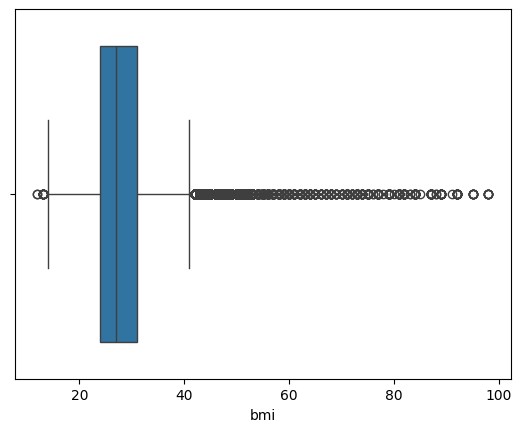

In [8]:
sns.boxplot(data=df_train, x='bmi')
plt.show()

In [9]:
Q1 = df_train['bmi'].quantile(0.25)  # Primer cuartil
Q3 = df_train['bmi'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1                     # Rango intercuartílico

# Limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_lower = df_train[(df_train['bmi'] < lower_bound)]

outliers_upper = df_train[(df_train['bmi'] > upper_bound)]


In [10]:
outliers_lower

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
3693,no_diabetes,no,yes,yes,13.0,yes,no,no,no,no,...,yes,no,3.0,0.0,7.0,no,female,10.0,5.0,4.0
18676,no_diabetes,no,no,yes,13.0,yes,no,no,no,yes,...,yes,no,4.0,3.0,5.0,no,female,13.0,3.0,1.0
28721,no_diabetes,no,no,yes,13.0,yes,no,no,no,no,...,yes,yes,5.0,0.0,30.0,yes,female,10.0,5.0,5.0
33336,prediabetes,yes,yes,yes,13.0,yes,no,no,no,no,...,yes,no,4.0,30.0,30.0,yes,female,10.0,5.0,1.0
34287,no_diabetes,no,no,yes,13.0,no,no,no,yes,yes,...,yes,no,3.0,7.0,0.0,no,female,9.0,2.0,1.0
43416,diabetes,no,yes,yes,13.0,no,no,no,no,no,...,yes,no,4.0,0.0,2.0,yes,male,6.0,4.0,8.0
52896,no_diabetes,no,no,yes,12.0,no,no,no,yes,yes,...,no,no,3.0,0.0,0.0,yes,female,13.0,5.0,2.0
71252,no_diabetes,yes,yes,yes,13.0,yes,no,no,no,no,...,yes,no,3.0,0.0,2.0,no,male,3.0,6.0,2.0
90521,no_diabetes,no,no,yes,13.0,no,no,no,yes,yes,...,yes,yes,5.0,30.0,30.0,no,female,6.0,4.0,8.0
110641,no_diabetes,no,no,yes,13.0,yes,no,no,yes,no,...,yes,yes,4.0,7.0,30.0,no,male,9.0,5.0,5.0


In [11]:
outliers_upper

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
65,no_diabetes,no,no,yes,49.0,no,no,no,yes,yes,...,yes,no,1.0,0.0,0.0,no,female,7.0,4.0,5.0
71,no_diabetes,yes,no,yes,44.0,no,no,no,yes,no,...,yes,no,3.0,2.0,1.0,no,male,6.0,6.0,7.0
100,no_diabetes,no,no,yes,58.0,yes,no,no,no,yes,...,yes,no,2.0,0.0,0.0,no,male,7.0,4.0,6.0
102,no_diabetes,yes,no,yes,43.0,no,no,no,no,yes,...,yes,no,3.0,0.0,0.0,no,male,3.0,4.0,3.0
110,no_diabetes,yes,yes,yes,48.0,yes,no,no,yes,yes,...,no,yes,1.0,30.0,3.0,no,female,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162276,diabetes,yes,no,yes,42.0,yes,no,yes,yes,no,...,yes,no,3.0,0.0,0.0,no,male,12.0,4.0,4.0
162298,no_diabetes,no,no,yes,44.0,no,no,no,yes,yes,...,yes,no,3.0,1.0,0.0,no,female,5.0,5.0,6.0
162314,diabetes,yes,yes,yes,56.0,no,no,yes,no,yes,...,yes,no,5.0,30.0,30.0,yes,male,6.0,6.0,4.0
162328,no_diabetes,yes,no,yes,46.0,yes,no,no,no,no,...,yes,yes,3.0,3.0,20.0,no,female,8.0,6.0,6.0


In [12]:

outliers_mayor_60 = df_train[(df_train['bmi'] > 60)]
outliers_mayor_60

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
216,no_diabetes,yes,yes,yes,74.0,no,no,no,yes,no,...,yes,no,4.0,10.0,10.0,no,male,10.0,2.0,4.0
257,no_diabetes,no,no,yes,83.0,no,no,no,no,no,...,no,no,3.0,0.0,0.0,no,male,9.0,3.0,2.0
1324,diabetes,no,no,yes,75.0,yes,no,no,yes,no,...,yes,no,3.0,0.0,1.0,no,male,6.0,5.0,8.0
1343,no_diabetes,yes,no,yes,62.0,no,no,no,yes,yes,...,yes,no,4.0,3.0,20.0,yes,female,7.0,4.0,7.0
1696,no_diabetes,yes,no,yes,62.0,no,no,no,no,no,...,yes,no,3.0,0.0,14.0,no,female,6.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160863,diabetes,yes,yes,yes,79.0,yes,no,no,yes,yes,...,yes,no,3.0,0.0,0.0,yes,male,5.0,6.0,8.0
161004,no_diabetes,yes,no,yes,84.0,no,no,no,yes,no,...,yes,no,1.0,0.0,0.0,no,female,7.0,6.0,7.0
161696,no_diabetes,no,no,no,77.0,yes,no,no,yes,yes,...,yes,no,4.0,0.0,2.0,no,male,3.0,4.0,7.0
162178,no_diabetes,no,yes,yes,64.0,yes,yes,no,yes,yes,...,yes,no,5.0,2.0,15.0,yes,male,11.0,6.0,6.0


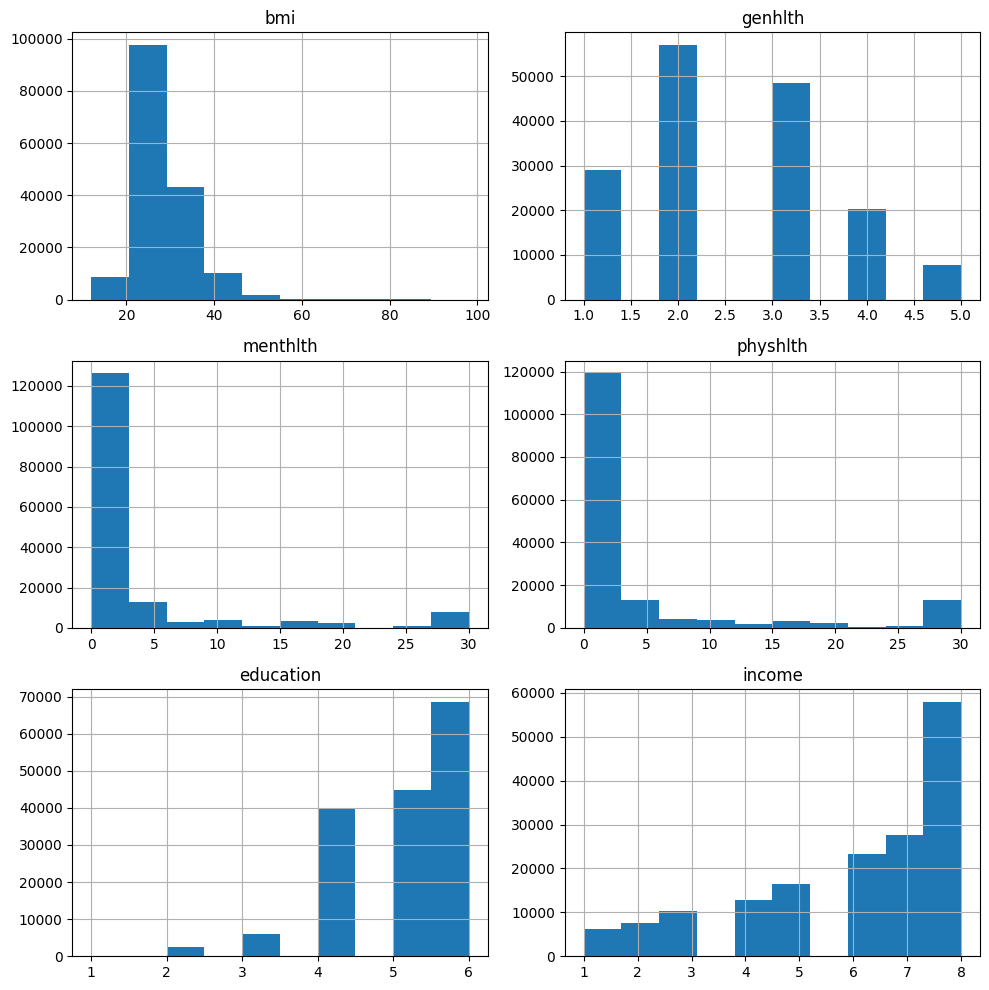

In [13]:
df_train.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

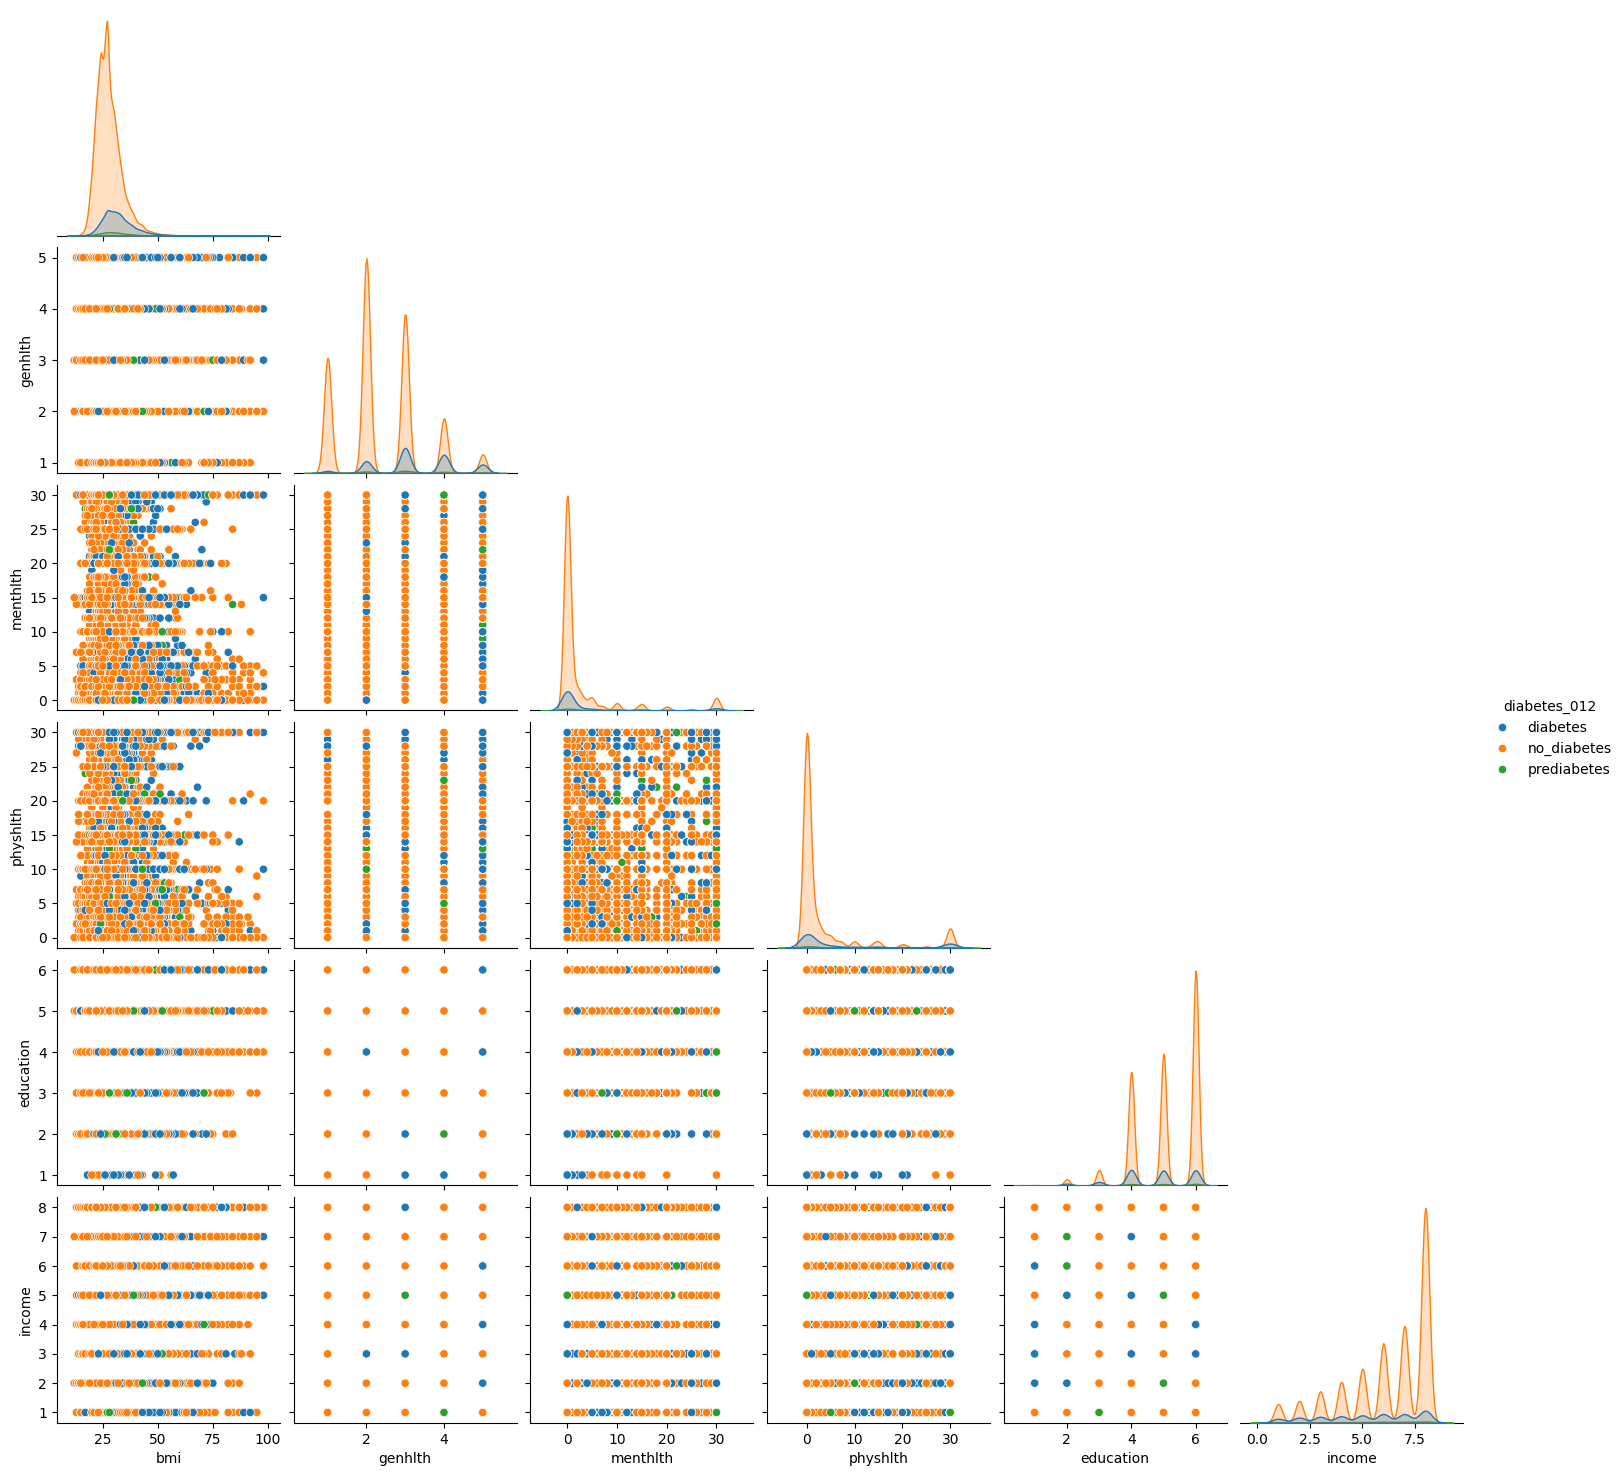

In [18]:
sns.pairplot(df_train, hue='diabetes_012', corner=True)
plt.show()

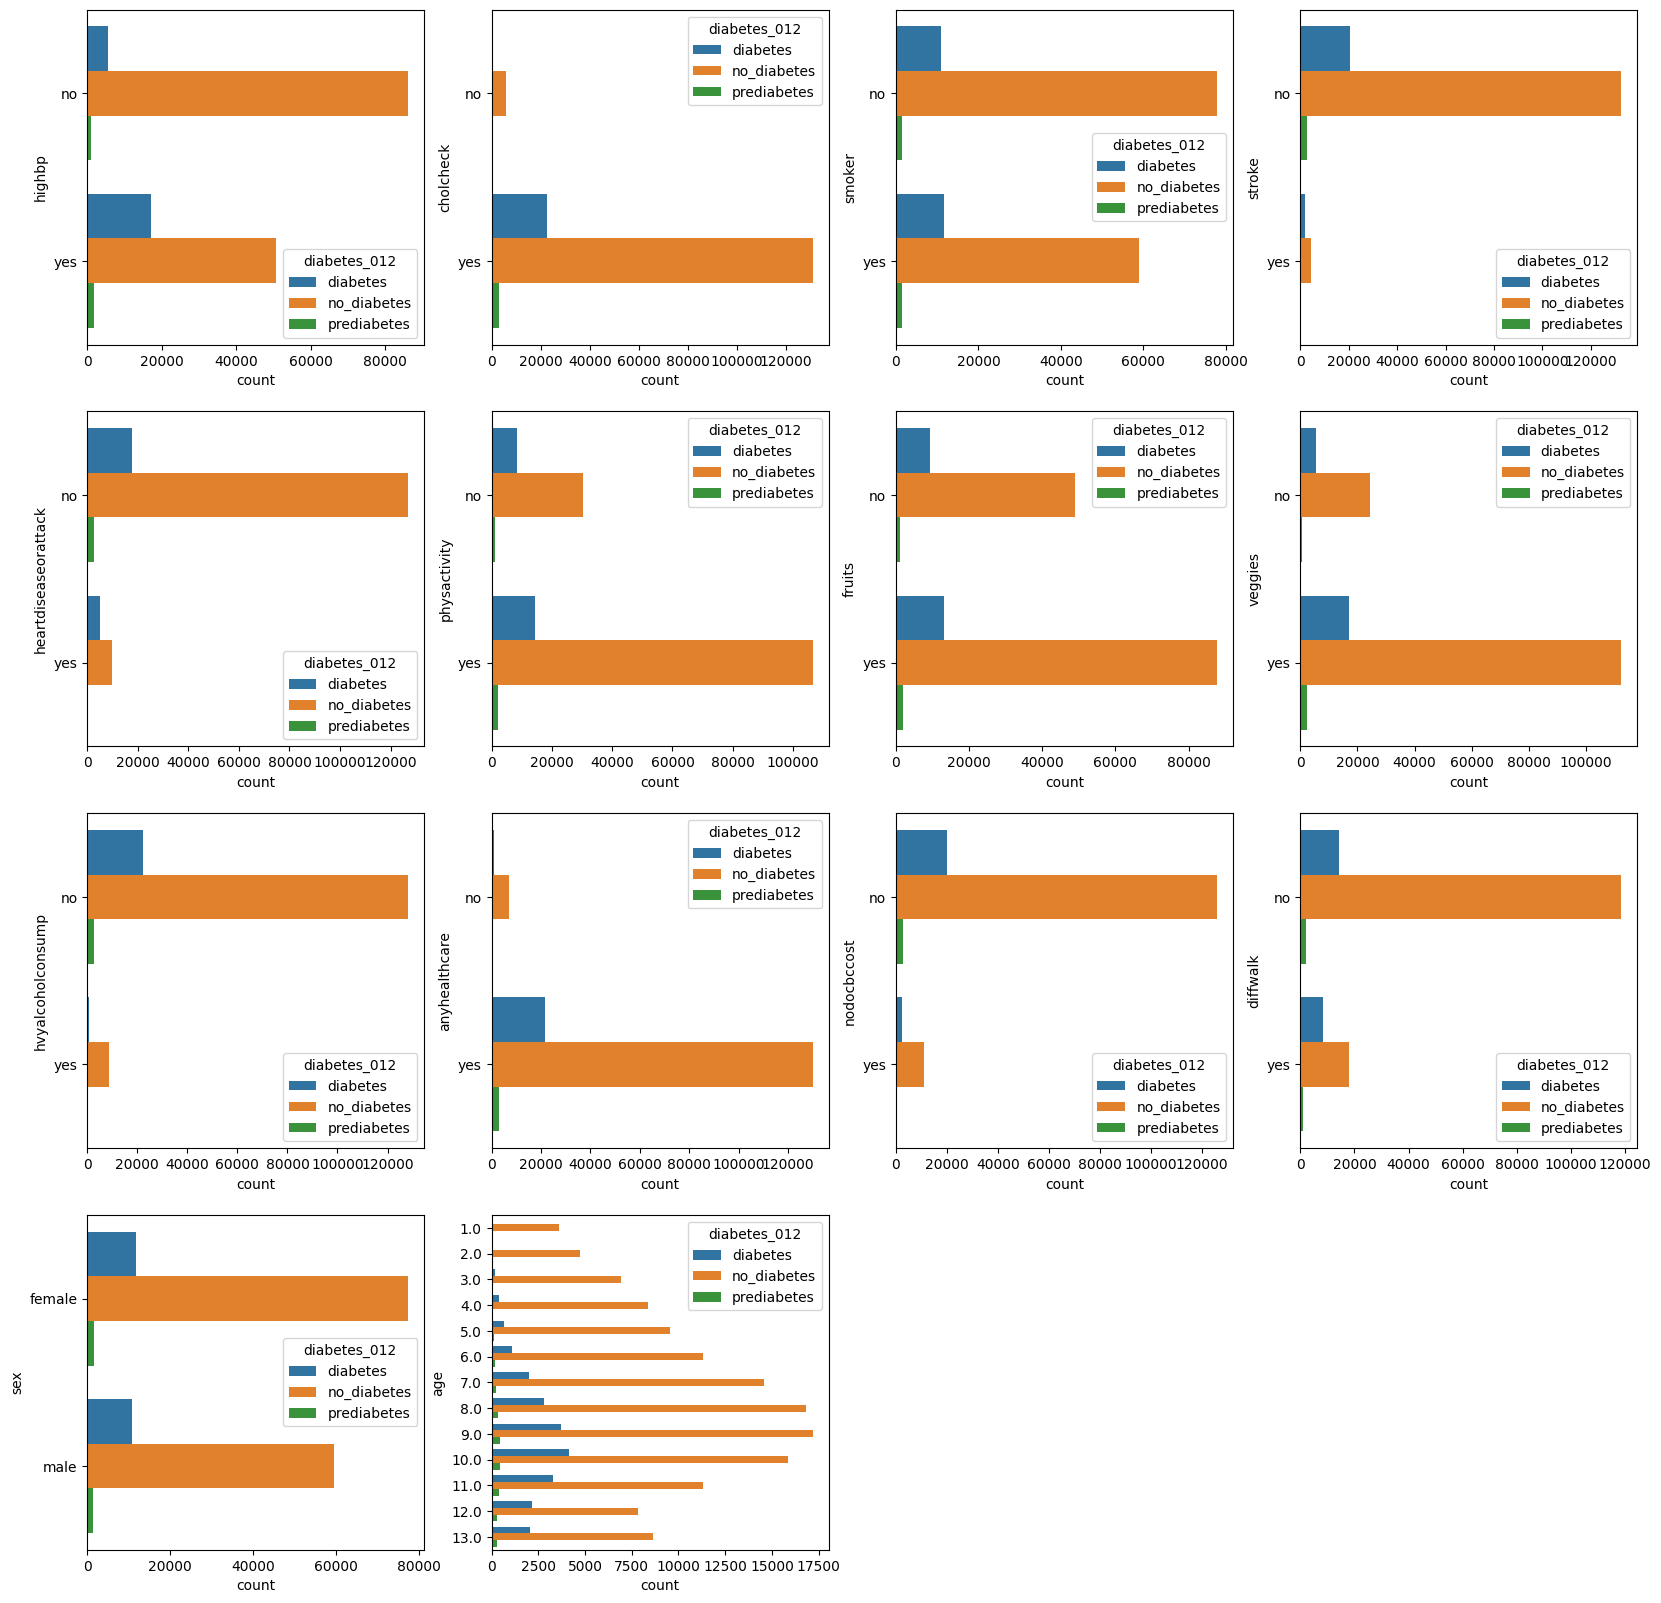

In [14]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
sns.countplot(data = df_train, y = 'highbp', hue='diabetes_012', ax = ax[0,0])
sns.countplot(data = df_train, y = 'cholcheck', hue='diabetes_012', ax = ax[0,1])
sns.countplot(data = df_train, y = 'smoker', hue='diabetes_012', ax = ax[0,2])
sns.countplot(data = df_train, y = 'stroke', hue='diabetes_012', ax = ax[0,3])
sns.countplot(data = df_train, y = 'heartdiseaseorattack', hue='diabetes_012', ax = ax[1,0])
sns.countplot(data = df_train, y = 'physactivity', hue='diabetes_012', ax = ax[1,1])
sns.countplot(data = df_train, y = 'fruits', hue='diabetes_012', ax = ax[1,2])
sns.countplot(data = df_train, y = 'veggies', hue='diabetes_012', ax = ax[1,3])
sns.countplot(data = df_train, y = 'hvyalcoholconsump', hue='diabetes_012', ax = ax[2,0])
sns.countplot(data = df_train, y = 'anyhealthcare', hue='diabetes_012', ax = ax[2,1])
sns.countplot(data = df_train, y = 'nodocbccost', hue='diabetes_012', ax = ax[2,2])
sns.countplot(data = df_train, y = 'diffwalk', hue='diabetes_012', ax = ax[2,3])
sns.countplot(data = df_train, y = 'sex', hue='diabetes_012', ax = ax[3,0])
sns.countplot(data = df_train, y = 'age', hue='diabetes_012', ax = ax[3,1])
# Ocultar el ax vacío
ax[3,2].set_visible(False)
ax[3,3].set_visible(False)
plt.show()

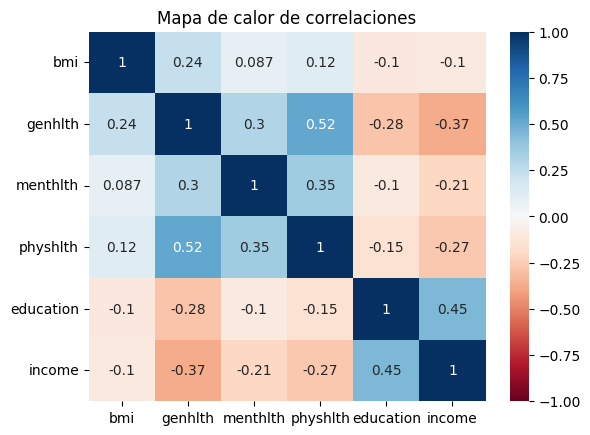

In [15]:
# Filtrar solo columnas numéricas
numericas = df_train.select_dtypes(include=['float']).columns

# Calcular la correlación para las columnas numéricas
corr_matrix = df_train[numericas].corr()

# Crear el heatmap
sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, annot=True, cmap='RdBu'
)
plt.title('Mapa de calor de correlaciones')
plt.show()

### **4.4 Machine learning**
**Objective**: Create a model that learns from data to make predictions and generalize to unseen data, and thus perform tasks without explicit instructions

In [16]:
X_train = df_train.drop('diabetes_012', axis=1)
y_train = df_train['diabetes_012']
X_val = df_val.drop('diabetes_012', axis=1)
y_val = df_val['diabetes_012']
X_test = df_test.drop('diabetes_012', axis=1)
y_test = df_test['diabetes_012']

In [17]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)